## Lab 2

### Part 3. Poetry generation

Let's try to generate some poetry using RNNs. 

You have several choices here: 

* The Shakespeare sonnets, file `sonnets.txt` available in the notebook directory.

* Роман в стихах "Евгений Онегин" Александра Сергеевича Пушкина. В предобработанном виде доступен по [ссылке](https://github.com/attatrol/data_sources/blob/master/onegin.txt).

* Some other text source, if it will be approved by the course staff.

Text generation can be designed in several steps:
    
1. Data loading.
2. Dictionary generation.
3. Data preprocessing.
4. Model (neural network) training.
5. Text generation (model evaluation).


In [1]:
import string
import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data loading: Shakespeare

Shakespeare sonnets are awailable at this [link](http://www.gutenberg.org/ebooks/1041?msg=welcome_stranger). In addition, they are stored in the same directory as this notebook (`sonnetes.txt`). Simple preprocessing is already done for you in the next cell: all technical info is dropped.

In [2]:
# if not os.path.exists('sonnets.txt'):
#     wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_basic/homeworks_basic/lab02_deep_learning/sonnets.txt

with open('sonnets.txt', 'r') as iofile:
    text = iofile.readlines()
    
TEXT_START = 45
TEXT_END = -368
text = text[TEXT_START : TEXT_END]
assert len(text) == 2616

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

max length = 56


(array([  2.,   4.,   5.,  15.,  31.,  39.,  62.,  86., 119., 143., 169.,
        203., 213., 187., 204., 154., 161.,  90.,  90.,  59.,  46.,  24.,
         20.,  14.,   8.]),
 array([30.  , 31.04, 32.08, 33.12, 34.16, 35.2 , 36.24, 37.28, 38.32,
        39.36, 40.4 , 41.44, 42.48, 43.52, 44.56, 45.6 , 46.64, 47.68,
        48.72, 49.76, 50.8 , 51.84, 52.88, 53.92, 54.96, 56.  ]),
 <a list of 25 Patch objects>)

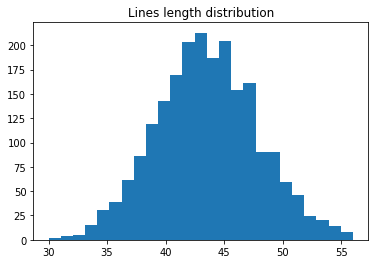

In [3]:
# Join all the strings into one and lowercase it
# Put result into variable text.

# Your great code here

# lowercase + remove lines with roman numerals and other extra symbols
lines = text
lines = [el.lower() for el in lines]
min_len = 20
max_len = 60
lines = [line for line in lines if len(line) > min_len and len(line) < max_len] 

lines = [line.strip() + '\n' for line in lines]

MAX_LENGTH = max(map(len, lines))
print("max length =", MAX_LENGTH)

plt.title('Lines length distribution')
plt.hist(list(map(len, lines)),bins=25)


In [4]:
# Join all the strings into one and lowercase it
text_as_string = ''.join(text)
text = text_as_string.lower()

assert len(text) == 100225, 'Are you sure you have concatenated all the strings?'
assert not any([x in set(text) for x in string.ascii_uppercase]), 'Uppercase letters are present'
print('OK!')

OK!


### Data loading: "Евгений Онегин"


In [23]:
!wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
    
with open('onegin.txt', 'r') as iofile:
    text = iofile.readlines()
    
text = [x.replace('\t\t', '') for x in text]

--2022-12-22 19:33:42--  https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262521 (256K) [text/plain]
Saving to: ‘onegin.txt.4’

onegin.txt.4        100%[===================>] 256.37K  --.-KB/s    in 0.03s   

2022-12-22 19:33:42 (7.44 MB/s) - ‘onegin.txt.4’ saved [262521/262521]



In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [18]:
# Join all the strings into one and lowercase it
# Put result into variable text.

# Your great code here

Put all the characters, that you've seen in the text, into variable `tokens`.

In [7]:
tokens = sorted(set(text))
num_tokens = len(tokens)

Create dictionary `token_to_idx = {<char>: <index>}` and dictionary `idx_to_token = {<index>: <char>}`

In [8]:
# dict <index>:<char>
# Your great code here

indices = np.arange(38)
token_to_idx = dict(zip(tokens, indices))
print(token_to_idx)

# dict <char>:<index>
# Your great code here

idx_to_token = dict(zip(indices, tokens))
print(idx_to_token)

{'\n': 0, ' ': 1, '!': 2, "'": 3, '(': 4, ')': 5, ',': 6, '-': 7, '.': 8, ':': 9, ';': 10, '?': 11, 'a': 12, 'b': 13, 'c': 14, 'd': 15, 'e': 16, 'f': 17, 'g': 18, 'h': 19, 'i': 20, 'j': 21, 'k': 22, 'l': 23, 'm': 24, 'n': 25, 'o': 26, 'p': 27, 'q': 28, 'r': 29, 's': 30, 't': 31, 'u': 32, 'v': 33, 'w': 34, 'x': 35, 'y': 36, 'z': 37}
{0: '\n', 1: ' ', 2: '!', 3: "'", 4: '(', 5: ')', 6: ',', 7: '-', 8: '.', 9: ':', 10: ';', 11: '?', 12: 'a', 13: 'b', 14: 'c', 15: 'd', 16: 'e', 17: 'f', 18: 'g', 19: 'h', 20: 'i', 21: 'j', 22: 'k', 23: 'l', 24: 'm', 25: 'n', 26: 'o', 27: 'p', 28: 'q', 29: 'r', 30: 's', 31: 't', 32: 'u', 33: 'v', 34: 'w', 35: 'x', 36: 'y', 37: 'z'}


*Comment: in this task we have only 38 different tokens, so let's use one-hot encoding.*

In [16]:
def to_matrix(lines, max_len=None, pad=token_to_idx[' '], dtype='int64', batch_first = True):
    
    max_len = (max_len or max(map(len, lines))) + 1
    lines_ix = np.zeros([len(lines), max_len], dtype) + pad

    for i in range(len(lines)):
        line_ix = [token_to_idx[c] for c in lines[i]]
        lines_ix[i, :len(line_ix)] = line_ix

    if not batch_first: # convert [batch, time] into [time, batch]
        char_batch = np.transpose(char_batch)

    return lines_ix

In [10]:
# one-hot encoding
def to_matrix(batch_letters, num_tokens = 38, pad=token_to_idx[' '], dtype='int32', batch_first = True):

    batch_len = len(batch_letters)
    char_batch = np.zeros([batch_len, num_tokens], dtype) 

    for i in range(batch_len):
        line_idx = token_to_idx[batch_letters[i]]

        char_batch[i, line_idx] = 1.0
        
    if not batch_first: 
        char_batch = np.transpose(char_batch)

    return char_batch

In [11]:
print(to_matrix("lisa", batch_first="True"))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]]


### Building the model

Now we want to build and train recurrent neural net which would be able to something similar to Shakespeare's poetry.

Let's use vanilla RNN, similar to the one created during the lesson.

In [12]:
# Your code here
import torch, torch.nn as nn
import torch.nn.functional as F


In [35]:
class CharRNNLoop(nn.Module):
    def __init__(self, num_tokens=num_tokens, emb_size=24, rnn_num_units=64):
        super(self.__class__, self).__init__()
        self.emb = nn.Embedding(num_tokens, emb_size)
        self.rnn = nn.RNN(emb_size, rnn_num_units, batch_first=True, num_layers=1)
        self.hid_to_logits = nn.Linear(rnn_num_units, num_tokens)
        
    def forward(self, x, h_state):
        assert isinstance(x.data, torch.LongTensor)
        h_seq, h_state = self.rnn(self.emb(x), h_state)
        logits = self.hid_to_logits(h_seq)
        next_logp = F.log_softmax(logits, dim=-1)
        return next_logp, h_state 
  
model = CharRNNLoop()
criterion = nn.NLLLoss()
opt = torch.optim.Adam(model.parameters())

Plot the loss function (axis X: number of epochs, axis Y: loss function).

In [14]:
from random import sample
from IPython.display import clear_output

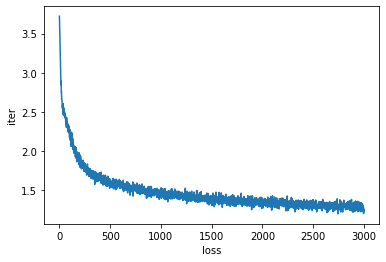

In [18]:
# Your plot code here
def plot_loss(hist):
    clear_output(True)
    plt.plot(hist, label='loss')
    plt.xlabel('loss')
    plt.ylabel('iter')
    plt.show()

hist = []
max_len = 56
n_iter = 3000
batch_len = 30

for i in range(n_iter):
    batch_ix = to_matrix(sample(lines, batch_len), max_len)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64)

    h_state = torch.zeros(1, batch_len, 64)
    logp_seq = model(batch_ix, h_state)[0]
    
    loss = criterion(logp_seq[:, :-1].contiguous().view(-1, num_tokens),
                 batch_ix[:, 1:].contiguous().view(-1))
    
    loss.backward()
    opt.step()
    opt.zero_grad()
    
    hist.append(loss.data.numpy())
    if (i + 1) % (n_iter * 0.1) == 0:
        plot_loss(hist)

In [70]:
def generate_sample(char_rnn, seed_phrase=' Hello', max_length=56, temperature=1.0):
    '''
    ### Disclaimer: this is an example function for text generation.
    ### You can either adapt it in your code or create your own function
    
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs, 
        smaller temperature converges to the single most likely output.
        
    Be careful with the model output. This model waits logits (not probabilities/log-probabilities)
    of the next symbol.
    '''
    x_sequence = [token_to_idx[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    hid_state = torch.zeros(1, 1, 64)

    #feed the seed phrase, if any
    if len(seed_phrase) > 1:
        out, hid_state = char_rnn(x_sequence[:, :-1], hid_state)
    #start generating
    for _ in range(max_length - len(seed_phrase)):
        out, hid_state = char_rnn(x_sequence[:, -1].view(1, 1), hid_state)
        p_next = F.softmax(out[:, -1]/ temperature, dim=-1).data.numpy()[0]
        # sample next token and push it back into x_sequence
        next_ix = np.random.choice(num_tokens,p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)
        
    return ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]])

In [71]:
# An example of generated text.
# print(generate_text(length=500, temperature=0.2))
print(generate_sample(model, seed_phrase="i ", temperature=0.7, max_length = 20))

i ,w-h:;elwt
r!ppegx


### More poetic model

Let's use LSTM instead of vanilla RNN and compare the results.

Plot the loss function of the number of epochs. Does the final loss become better?

In [ ]:
# Your beautiful code here

Generate text using the trained net with different `temperature` parameter: `[0.1, 0.2, 0.5, 1.0, 2.0]`.

Evaluate the results visually, try to interpret them.

In [ ]:
# Text generation with different temperature values here

### Saving and loading models

Save the model to the disk, then load it and generate text. Examples are available [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html]).

In [ ]:
# Saving and loading code here

### References
1. <a href='http://karpathy.github.io/2015/05/21/rnn-effectiveness/'> Andrew Karpathy blog post about RNN. </a> 
There are several examples of genration: Shakespeare texts, Latex formulas, Linux Sourse Code and children names.
2. <a href='https://github.com/karpathy/char-rnn'> Repo with char-rnn code </a>
3. Cool repo with PyTorch examples: [link](https://github.com/spro/practical-pytorch`)